<a href="https://colab.research.google.com/github/Maralmaa1/DIV-tasks/blob/main/BInary_classification_of_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Assignment 1] Select features and categories for practice

There are a total of 18 ways to choose, but we will practice with the following combinations. After getting the iris dataset in the same way as Week3, extract these from the data frame.

virgicolor and virginica
sepal_length and petal_length

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

In [3]:
import pandas as pd

data = pd.DataFrame(data=iris.data[50:],columns=iris.feature_names)
target = pd.DataFrame(data=iris.target[50:], columns=['species'])
data = data.drop(columns=['sepal width (cm)','petal width (cm)'])
data

,sepal length (cm),petal length (cm)
0,7.0,4.7
1,6.4,4.5
2,6.9,4.9
3,5.5,4.0
4,6.5,4.6
...,...,...
95,6.7,5.2
96,6.3,5.0
97,6.5,5.2
98,6.2,5.4


[Question 2] Data analysis

First, we will analyze the data, which we did in Task 1 of Week 3. By looking at the scatterplot matrix that was output at that time, you can also check the scatterplots for each of the 18 patterns mentioned earlier. You'll find that using sepal_length and petal_length to classify virgicolor and virginica is a bit of a tricky situation.

Here, as a review, please display the scatterplot, boxplot, and violinplot of the extracted data.

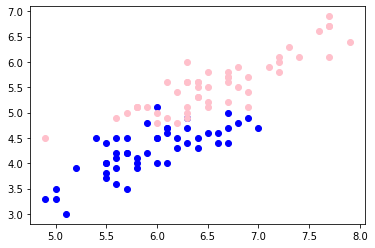

In [4]:
import matplotlib.pyplot as plt

plt.scatter(data.iloc[:49,0], data.iloc[:49,1],color=['blue'])

plt.scatter(data.iloc[50:,0], data.iloc[50:,1], color='pink')
plt.show()


<Axes: xlabel='species', ylabel='sepal_length'>

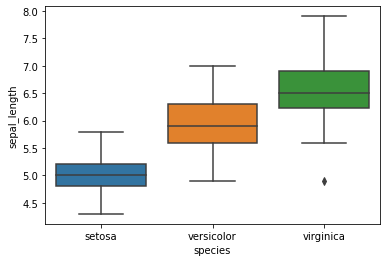

In [5]:
import seaborn as sns

df = sns.load_dataset('iris')

sns.boxplot( x=df["species"], y=df["sepal_length"] )

<Axes: xlabel='species', ylabel='sepal_length'>

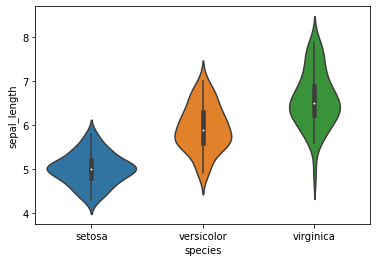

In [6]:
sns.violinplot( x=df["species"], y=df["sepal_length"] )

[Problem 3] Division of preprocessing/training data and validation data

As part of the preprocessing, we split the training and validation data. This time split the data as 75% training data and 25% validation data.

scikit-learn train_test_splitis available. Please refer to the examples in the official document.

In [7]:
from sklearn.model_selection import train_test_split
import numpy as np

x_train, x_test, y_train, y_test = train_test_split(data, target, train_size=0.75, random_state=0)

print('train feature shape: {}'.format(x_train.shape))
print('test feature shape: {}'.format(x_test.shape))
print('train label shape: {}'.format(y_train.shape))
print('test label shape: {}'.format(y_test.shape))

train feature shape: (75, 2)
test feature shape: (25, 2)
train label shape: (75, 1)
test label shape: (25, 1)


[Problem 4] Preprocessing and standardization

Processing is performed to increase the classification accuracy. The appropriate method differs for each technique, but here we will use standardization as an example.

A standardization library is also available in scikit-learn. Use this to standardize.

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
x_train_scaler = scaler.transform(x_train)
x_test_scaler = scaler.transform(x_test)

[Question 5] Learning and Estimation

It learns by the nearest neighbors method (k-nearest neighbors, k-nn). Please learn k-nn by referring to Examples in the scikit-learn official document. Input here is the training data.

In [12]:
from sklearn.neighbors import KNeighborsClassifier

neigh1 = KNeighborsClassifier(n_neighbors=1)
neigh1.fit(x_train, y_train)
result1 = neigh1.predict(x_test)
result1

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array([1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2,
       1, 2, 1])

In [13]:
neigh2 = KNeighborsClassifier(n_neighbors=3)
neigh2.fit(x_train, y_train)
result2 = neigh2.predict(x_test)
result2

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array([1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2,
       1, 2, 1])

In [14]:

neigh3 = KNeighborsClassifier(n_neighbors=5)
neigh3.fit(x_train, y_train)
result3 = neigh3.predict(x_test)
result3

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array([1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2,
       1, 2, 1])

Question 6] Evaluation

Calculate the closeness between the estimated value obtained by inputting the feature value of the validation data and the correct value of the validation data, and evaluate the trained model.

Index values ​​for evaluating binary classification include Accuracy (correct answer rate) , Precision (precision rate) , Recall (recall rate) and F value . To understand what each means, you have to look at the confusion matrix .

* Calculate 4 types of indicators using scikit-learn
* Display confusion matrix using scikit-learn
* Briefly investigate the meaning of the four types of index values ​​and summarize them in sentences

In [15]:
from sklearn.metrics import classification_report
print('result1 1_nn report: \n',classification_report(y_test, result1))
print('result2 3_nn report: \n',classification_report(y_test, result2))
print('result3 5_nn report: \n',classification_report(y_test, result3))

result1 1_nn report: 
               precision    recall  f1-score   support

           1       1.00      0.85      0.92        13
           2       0.86      1.00      0.92        12

    accuracy                           0.92        25
   macro avg       0.93      0.92      0.92        25
weighted avg       0.93      0.92      0.92        25

result2 3_nn report: 
               precision    recall  f1-score   support

           1       1.00      0.85      0.92        13
           2       0.86      1.00      0.92        12

    accuracy                           0.92        25
   macro avg       0.93      0.92      0.92        25
weighted avg       0.93      0.92      0.92        25

result3 5_nn report: 
               precision    recall  f1-score   support

           1       1.00      0.85      0.92        13
           2       0.86      1.00      0.92        12

    accuracy                           0.92        25
   macro avg       0.93      0.92      0.92        25
weigh

In [16]:
from sklearn.metrics import accuracy_score

# In multilabel classification, this function computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.

print('result1 1_nn score = ', accuracy_score(y_test, result1))
print('result2 3_nn score = ', accuracy_score(y_test, result2))
print('result3 5_nn score = ', accuracy_score(y_test, result3))
     

result1 1_nn score =  0.92
result2 3_nn score =  0.92
result3 5_nn score =  0.92


In [17]:
from sklearn.metrics import precision_score

# The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives.
#  The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

# The best value is 1 and the worst value is 0.

print('result1 1_nn macro = ', precision_score(y_test, result1, average='macro'))
print('result1 1_nn micro = ', precision_score(y_test, result1, average='micro'))
print('result1 1_nn weighted = ', precision_score(y_test, result1, average='weighted'))
print('result1 1_nn None = ', precision_score(y_test, result1, average=None))
print('')

print('result2 3_nn macro = ', precision_score(y_test, result2, average='macro'))
print('result2 3_nn micro = ', precision_score(y_test, result2, average='micro'))
print('result2 3_nn weighted = ', precision_score(y_test, result2, average='weighted'))
print('result2 3_nn None = ', precision_score(y_test, result2, average=None))
print('')

print('result3 5_nn macro = ', precision_score(y_test, result3, average='macro'))
print('result3 5_nn micro = ', precision_score(y_test, result3, average='micro'))
print('result3 5_nn weighted = ', precision_score(y_test, result3, average='weighted'))
print('result3 5_nn None = ', precision_score(y_test, result3, average=None))
     

result1 1_nn macro =  0.9285714285714286
result1 1_nn micro =  0.92
result1 1_nn weighted =  0.9314285714285714
result1 1_nn None =  [1.         0.85714286]

result2 3_nn macro =  0.9285714285714286
result2 3_nn micro =  0.92
result2 3_nn weighted =  0.9314285714285714
result2 3_nn None =  [1.         0.85714286]

result3 5_nn macro =  0.9285714285714286
result3 5_nn micro =  0.92
result3 5_nn weighted =  0.9314285714285714
result3 5_nn None =  [1.         0.85714286]


In [18]:
from sklearn.metrics import recall_score

print('result1 1_nn macro = ', recall_score(y_test, result1, average='macro'))
print('result1 1_nn micro = ', recall_score(y_test, result1, average='micro'))
print('result1 1_nn weighted = ', recall_score(y_test, result1, average='weighted'))
print('result1 1_nn None = ', recall_score(y_test, result1, average=None))
print('')

# The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives.
#  The recall is intuitively the ability of the classifier to find all the positive samples.

print('result2 3_nn macro = ', recall_score(y_test, result2, average='macro'))
print('result2 3_nn micro = ', recall_score(y_test, result2, average='micro'))
print('result2 3_nn weighted = ', recall_score(y_test, result2, average='weighted'))
print('result2 3_nn None = ', recall_score(y_test, result2, average=None))
print('')

print('result3 5_nn macro = ', recall_score(y_test, result3, average='macro'))
print('result3 5_nn micro = ', recall_score(y_test, result3, average='micro'))
print('result3 5_nn weighted = ', recall_score(y_test, result3, average='weighted'))
print('result3 5_nn None = ', recall_score(y_test, result3, average=None))
     

result1 1_nn macro =  0.9230769230769231
result1 1_nn micro =  0.92
result1 1_nn weighted =  0.92
result1 1_nn None =  [0.84615385 1.        ]

result2 3_nn macro =  0.9230769230769231
result2 3_nn micro =  0.92
result2 3_nn weighted =  0.92
result2 3_nn None =  [0.84615385 1.        ]

result3 5_nn macro =  0.9230769230769231
result3 5_nn micro =  0.92
result3 5_nn weighted =  0.92
result3 5_nn None =  [0.84615385 1.        ]


In [19]:
from sklearn.metrics import f1_score

# The F1 score can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
#  The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:

# F1 = 2 * (precision * recall) / (precision + recall)
# In the multi-class and multi-label case, this is the average of the F1 score of each class with weighting depending on the average parameter.

print('result1 1_nn macro = ', f1_score(y_test, result1, average='macro'))
print('result1 1_nn micro = ', f1_score(y_test, result1, average='micro'))
print('result1 1_nn weighted = ', f1_score(y_test, result1, average='weighted'))
print('result1 1_nn None = ', f1_score(y_test, result1, average=None))
print('')

print('result2 3_nn macro = ', f1_score(y_test, result2, average='macro'))
print('result2 3_nn micro = ', f1_score(y_test, result2, average='micro'))
print('result2 3_nn weighted = ', f1_score(y_test, result2, average='weighted'))
print('result2 3_nn None = ', f1_score(y_test, result2, average=None))
print('')

print('result3 5_nn macro = ', f1_score(y_test, result3, average='macro'))
print('result3 5_nn micro = ', f1_score(y_test, result3, average='micro'))
print('result3 5_nn weighted = ', f1_score(y_test, result3, average='weighted'))
print('result3 5_nn None = ', f1_score(y_test, result3, average=None))
     

result1 1_nn macro =  0.9198717948717948
result1 1_nn micro =  0.92
result1 1_nn weighted =  0.9197435897435898
result1 1_nn None =  [0.91666667 0.92307692]

result2 3_nn macro =  0.9198717948717948
result2 3_nn micro =  0.92
result2 3_nn weighted =  0.9197435897435898
result2 3_nn None =  [0.91666667 0.92307692]

result3 5_nn macro =  0.9198717948717948
result3 5_nn micro =  0.92
result3 5_nn weighted =  0.9197435897435898
result3 5_nn None =  [0.91666667 0.92307692]


In [20]:
from sklearn.metrics import confusion_matrix

# By definition a confusion matrix  is such that  is equal to the number of observations known to be in group  and predicted to be in group .

# Thus in binary classification, the count of true negatives is , false negatives is , true positives is  and false positives is .

print('result1 1_n = \n', confusion_matrix(y_test, result1))
print('')
print('result2 3_n = \n', confusion_matrix(y_test, result2))
print('')
print('result3 5_n = \n', confusion_matrix(y_test, result3))

result1 1_n = 
 [[11  2]
 [ 0 12]]

result2 3_n = 
 [[11  2]
 [ 0 12]]

result3 5_n = 
 [[11  2]
 [ 0 12]]


[Question 7] Visualization

Visualization is performed as part of the evaluation. In this case, we used 2D feature values ​​for classification, so we can visualize it with a scatter plot. Below is a function that draws a decision area on how to divide. Please use this for visualization. For X and y, give training or validation data.

In [28]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

iris = load_iris
data = load_iris().data
target = load_iris().target.reshape(-1,1)
iris = np.concatenate([data,target], axis=1)
iris = pd.DataFrame(iris)
X = iris.loc[iris[4]!=0,2:3].values
y = iris.loc[iris[4]!=0,4].values

# split datasets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
   
def decision_region(X, y, model, step=0.01, title='decision region of 3-nn', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(np.unique(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

neigh2 = KNeighborsClassifier(n_neighbors=3)
neigh2.fit(X_train, y_train)
result2 = neigh2.predict(X_test)
result2

array([1., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 1., 1., 1., 2.,
       1., 2., 1.])

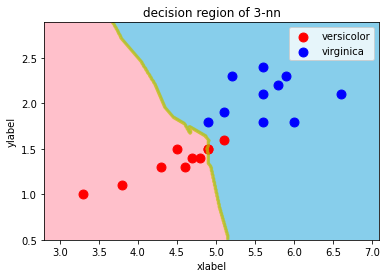

In [29]:
decision_region(X_test, y_test, neigh2)


[Question 8] Learning other methods

Please learn, estimate, evaluate, and visualize all of the following methods. Then, summarize the index values ​​in one table. Briefly discuss the results using the table and decision area. Please state which method was good at which indicator value and what decision area was.

* Nearest method
* logistic regression
* SVM
* decision tree
* random forest

The link to the official documentation is below. Each has its own parameters (hyperparameters) to adjust, which are beyond the scope of this exercise. Run with the default values ​​first.

In [31]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
neigh_pred = neigh.predict(X_test)

accuracy = accuracy_score(y_test, neigh_pred)
print('accuracy',accuracy)
     

accuracy 0.85


In [32]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
clf_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, clf_pred)
print('accuracy',accuracy)

accuracy 0.95


In [33]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
svm = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, svm_pred)
print('accuracy',accuracy)

accuracy 0.95


In [34]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train,y_train)
dt_pred = dt.predict(X_test)

accuracy = accuracy_score(y_test, dt_pred)
print('accuracy',accuracy)

accuracy 0.8


In [35]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, rf_pred)
print('accuracy',accuracy)

accuracy 0.85
